# Midas IIIT-D Summer Internship Task 2

## Computer Vision Problem

###  Problem Statement
You can download train and test dataset from [here](https://https://drive.google.com/drive/folders/1F2PjpJ_u_iaD-Fs0wwcymRiVVLK34-Fu?usp=sharing). This dataset has 4 classes. Labels for training data are provided, you have to submit labels of test data. Feel free to use any Machine learning or Deep learning technique.

### Importing Libraries




*   Pandas for data manipulation
*   Numpy for mathematical operations
*  Matplotlib and Seaborn for plotting graphs
*  Pickle for extracting image data from provided pkl files
*  Keras for creating deep neural networks





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pickle

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization





### Retreiving data

Data is provided as pkl files.
The pkl files are unpacked into python lists and then converted into numpy arrays for easier manipulations

In [0]:
with open('drive/My Drive/Vision_task_dataset_public/train_image.pkl', 'rb') as f:
  train_image = pickle.load(f)
  
with open('drive/My Drive/Vision_task_dataset_public/train_label.pkl', 'rb') as f:
  train_label = pickle.load(f)

In [0]:
train_image = np.array(train_image, dtype='float32')
train_label = np.array(train_label, dtype='float32')

In [7]:
print(f"Total number of images in dataset are: {train_image.shape[0]}")

Total number of images in dataset are: 8000


### Playing with training data



In [0]:
data = pd.DataFrame(train_image)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,142.0,200.0,...,120.0,110.0,158.0,18.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,80.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
data['label'] = train_label
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,142.0,200.0,...,110.0,158.0,18.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Checking the number of images provided for each class

In [11]:
data['label'].value_counts()

6.0    2000
3.0    2000
2.0    2000
0.0    2000
Name: label, dtype: int64

Since the data appears to be ordered we randomly shuffle the data using sklearn utility functions








In [0]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True)

Separating images and labels once again, after data manipulation has been applied

In [0]:
imgs = data.drop(['label'], axis=1)
labels = data['label']

In [14]:
imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,132.0,142.0,55.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,154.0,167.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.0,31.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,87.0,95.0,112.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,138.0,...,180.0,195.0,166.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
labels.head()

0    6.0
1    0.0
2    6.0
3    3.0
4    0.0
Name: label, dtype: float32

Since Convolutional Neural Networks converge faster with values between 0 and 1,
we divide each pixel value by 255.

In [0]:
imgs = imgs/255.0

In [17]:
imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.003922,0.000000,0.000000,0.000000,...,0.003922,0.007843,0.000000,0.000000,0.517647,0.556863,0.215686,0.0,0.0,0.0
1,0.0,0.0,0.0,0.007843,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.603922,0.654902,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.113725,0.121569,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.003922,0.003922,0.003922,0.000000,0.000000,...,0.341176,0.372549,0.439216,0.317647,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.098039,0.541176,...,0.705882,0.764706,0.650980,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0


To convert labels into one hot encoded vectors and for easier prediction for the neural net, we map the values of provided classes so that the classes are in order.

> 0 is mapped to 0.

> 2 is mapped to 1.

> 3 is mapped to 2.

> 6 is mapped to 3.

In [0]:
labels = labels.map({0: 0, 2: 1, 3: 2, 6: 3})
labels = np.array(pd.get_dummies(labels))

In [19]:
labels

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

Reshaping the image data in the format

(NUM_IMAGES, WIDTH, HEIGHT, 1)

This is the format recognised by the neural net

In [0]:
imgs = np.array(imgs).reshape(-1, 28, 28, 1)

In [21]:
imgs.shape

(8000, 28, 28, 1)

Splitting the training data into training and validation sets using sklearn utility function.

Validation data will help us keep a track of how well our network predicts the classes

In [0]:
x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.15, random_state=42)

In [24]:
print(f"Number of images in training data is {x_train.shape[0]}")
print(f"Number of images in validation data is {x_val.shape[0]}")

Number of images in training data is 6800
Number of images in validation data is 1200


Randomly plotting any image from the dataset

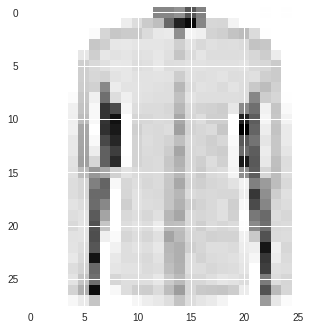

In [25]:
plt.imshow(x_train[100].reshape((28,28)))

### Creating the model

For the classification tasks, Convolutional Neural Networks work best.

We create a CNN using the Keras Sequential API.

The model is a very deep neural net with - 

 * 2D Convolutional layers activated by relu function.

* BatchNormalization layers  so that the model converges better. BatchNormalization is used to normalise the intermediate values inside the network.

* Dropout Layers are used to switch off some neurons at random. It helps to reduce overfitting.

* MaxPooling is used to reduce the spatial size of our data. It reduces the amount of parameters and helps in reducing computational time.

* Dense layers making a fully connected network for serving our predictions. Activated by softmax.  Since there are 4 classes, last Dense layer has 4 neurons only

In [26]:
from keras.layers import LeakyReLU

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    
#     Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
#     BatchNormalization(),
#     Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
#     BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),

# #     Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
# #     BatchNormalization(),
# #     Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
# #     BatchNormalization(),
# #     Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
# #     BatchNormalization(),
# #     MaxPool2D(pool_size=(2,2), strides=(2,2)),
# #     Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256),
    LeakyReLU(alpha=0.05),
    Dropout(0.1),
    Dense(4, activation='softmax')
    
])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

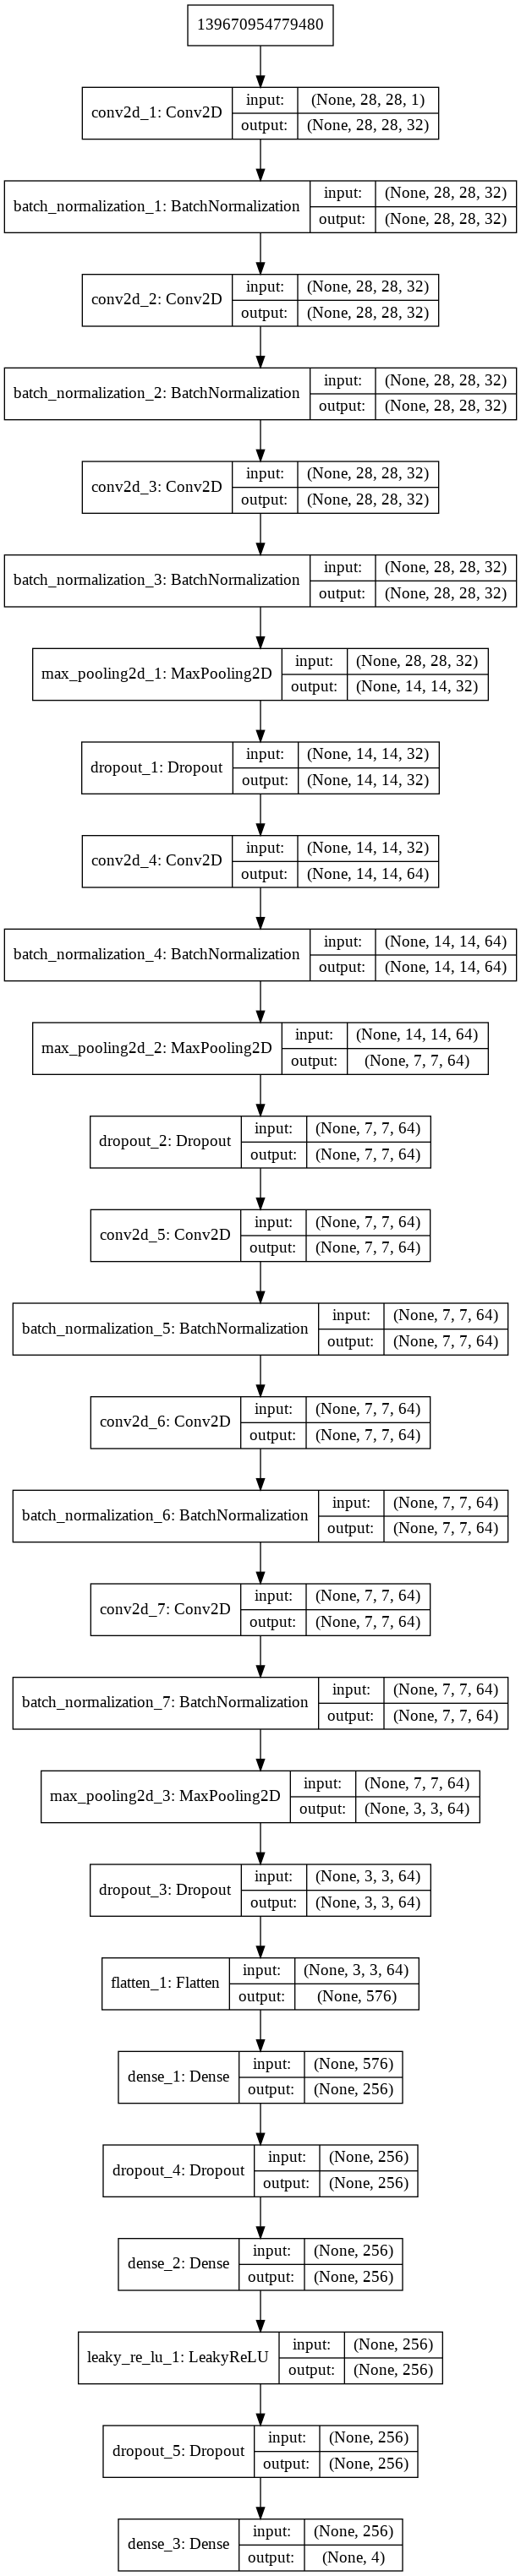

In [30]:
from IPython.display import Image
Image('model_plot.png')







**Categorical cross entropy loss function is used because we are classifying images in 4 different categories one-hot encoded into vectors**

```
RMSprop optimization algorithm is used to avoid exploding and vanishing gradients
```

In [0]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**This callback is used to dynamically change the learning rate of the neural net.
If no improvement is seen in the validation accuracy for 3 epochs it reduces the learning rate. **

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=2,
                                           factor=0.5,
                                           min_lr=0.00001)

The model is trained for 30 epochs with a batch size of 86 images per epoch

In [0]:
epochs = 30
batch_size = 86

In [0]:
# from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=5, verbose=2)
#train model
# model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

### Data Augmentation

Data augmentation is a very important process in computer vision tasks

The images are randomly zoomed in and rotated, and shifted so that the model does not overfit

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=0,
                            zoom_range=0.01,
                            width_shift_range=0.03,
                            height_shift_range=0.03,
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(x_train)

### Training the model

In [36]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                             epochs=epochs,
                             validation_data=(x_val, y_val),
                             verbose=2,
                             steps_per_epoch = x_train.shape[0]//batch_size,
                             callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 7s - loss: 0.9460 - acc: 0.6283 - val_loss: 0.7670 - val_acc: 0.7358
Epoch 2/30
 - 3s - loss: 0.6306 - acc: 0.7400 - val_loss: 0.5060 - val_acc: 0.7942
Epoch 3/30
 - 3s - loss: 0.5290 - acc: 0.7858 - val_loss: 0.5086 - val_acc: 0.7942
Epoch 4/30
 - 3s - loss: 0.4758 - acc: 0.8062 - val_loss: 0.3865 - val_acc: 0.8342
Epoch 5/30
 - 3s - loss: 0.4263 - acc: 0.8351 - val_loss: 0.3836 - val_acc: 0.8558
Epoch 6/30
 - 3s - loss: 0.4094 - acc: 0.8404 - val_loss: 0.3584 - val_acc: 0.8550
Epoch 7/30
 - 3s - loss: 0.3796 - acc: 0.8510 - val_loss: 0.3993 - val_acc: 0.8392
Epoch 8/30
 - 3s - loss: 0.3709 - acc: 0.8557 - val_loss: 0.3630 - val_acc: 0.8533

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/30
 - 3s - loss: 0.3063 - acc: 0.8840 - val_loss: 0.3155 - val_acc: 0.8792
Epoch 10/30
 - 3s - loss: 0.3033 - acc: 0.8825 - val_loss: 0.3254 - val_acc: 0.8767
Epoch 11/30
 - 3s - loss: 0.2927 - acc: 

### Evaluating the model

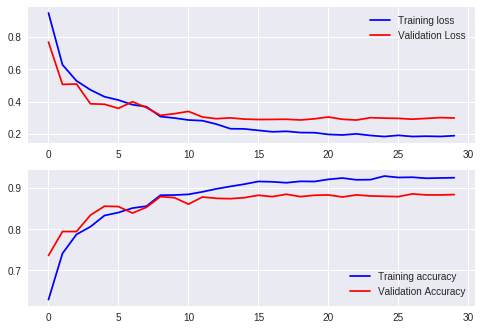

In [37]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_acc'], color='r', label='Validation Accuracy')
legend = ax[1].legend(loc='best', shadow='True')

- Make predictions from trained model for validation data.
- np.argmax returns index of the highest value from the predictions numpy array.
- Plotting the confusion matrix using seaborn

In [0]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

As we can see, Class 1 is most accurately predicted with fairly good predictions for other classes as well

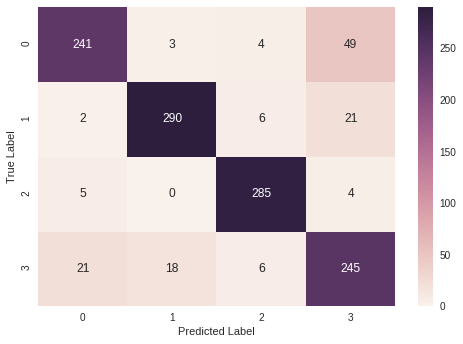

In [39]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
from sklearn.metrics import classification_report, accuracy_score
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(y_true, y_pred_classes, target_names=target_names))

print(f'Accuracy : {accuracy_score(y_true, y_pred_classes)}')

              precision    recall  f1-score   support

     Class 0       0.90      0.81      0.85       297
     Class 1       0.93      0.91      0.92       319
     Class 2       0.95      0.97      0.96       294
     Class 3       0.77      0.84      0.80       290

   micro avg       0.88      0.88      0.88      1200
   macro avg       0.89      0.88      0.88      1200
weighted avg       0.89      0.88      0.88      1200

Accuracy : 0.8841666666666667


Precision is highest for Class 2, i.e., class 3 in our training dataset.

Class 3(i.e. class 6) performs the worst in this classification task.

### Making predictions


In [43]:
y_pred_classes.shape

(1200,)

In [44]:
x_val.shape

(1200, 28, 28, 1)

In [0]:
with open('drive/My Drive/Vision_task_dataset_public/test_image.pkl', 'rb') as f:
  test_image = pickle.load(f)

In [0]:
test = (np.array(test_image).reshape(-1, 28, 28, 1))/255.0

In [47]:
test.shape

(2000, 28, 28, 1)

In [0]:
results = model.predict(test)

In [0]:
results = np.argmax(results, axis=1)

In [0]:
test_results = pd.DataFrame(test_image)

In [51]:
test_results.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,52,...,187,173,148,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,74,...,105,15,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,34,33,14,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,18,...,54,51,63,34,0,1,0,0,0,0
4,0,0,0,0,0,0,0,26,64,134,...,41,41,37,35,36,36,0,0,0,0


In [52]:
test_results.shape

(2000, 784)

In [0]:
test_results['class'] = results

In [54]:
test_results.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,52,...,173,148,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,74,...,15,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,33,14,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,18,...,51,63,34,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,26,64,134,...,41,37,35,36,36,0,0,0,0,0


In [55]:
test_results['class'].nunique()

4

In [56]:
test_results['class'].unique()

array([0, 3, 1, 2])

In [57]:
test_results['class'].value_counts()

3    532
1    498
2    497
0    473
Name: class, dtype: int64

We need to map the predicted values back to original labels

In [0]:
test_results['class'] = test_results['class'].map({
    0: 0,
    1: 2,
    2: 3,
    3: 6
})

In [59]:
test_results.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
345,0,0,0,0,0,0,0,0,0,15,...,125,133,42,0,0,0,0,0,0,0
1750,0,0,0,0,0,0,0,0,0,1,...,10,0,0,87,120,58,0,0,0,6
1341,0,0,0,0,0,0,0,0,0,44,...,0,0,0,0,0,0,0,0,0,3
1100,0,0,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,3
483,0,0,2,1,0,0,0,0,0,0,...,88,0,0,0,1,0,1,0,0,0


In [60]:
test_results['class'].unique()

array([0, 6, 2, 3])

In [0]:
submission = pd.DataFrame()

In [0]:
submission['image_index'] = test_results.index

In [0]:
submission['class'] = test_results['class']

In [64]:
submission.sample(5)

,image_index,class
1051,1051,3
42,42,0
1402,1402,3
1694,1694,6
1626,1626,6


In [0]:
submission.to_csv('anmol_goel.csv')